In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from copy import deepcopy as copy
import matplotlib.backends.backend_pdf
import scipy as sp
import scipy.stats as stats
import math
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
# plotly.tools.set_credentials_file(username='mhossa10', api_key='CSWpOV3xHUVRzimjfHSB')

In [14]:
color_list1 = ['#1b9e77', '#d95f02', '#7570b3', '#e7298a', '#66a61e', '#e6ab02']
color_list2 = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33']
color_list3 = ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c']

,NonZeroPerRow,M,N,AvgTime,TotalRun,NonZeroElements,Bandwidth,Flops,Partition,ValueType
0,1.0,500000,1000000,0.573093,1000,500000,31.252905,1.953306,416,8
1,2.0,500000,1000000,0.656441,1000,1000000,44.477745,3.421365,416,8
2,3.0,500000,1000000,0.876989,1000,1500000,44.652590,3.721049,416,8
3,4.0,500000,1000000,1.140450,1000,2000000,43.142699,3.751539,416,8
4,5.0,500000,1000000,1.385832,1000,2500000,43.227792,3.859624,416,8
5,6.0,500000,1000000,1.730694,1000,3000000,39.469504,3.588137,416,8
6,7.0,500000,1000000,1.782317,1000,3500000,44.972133,4.142170,416,8
7,8.0,500000,1000000,1.886137,1000,4000000,48.020540,4.467027,416,8
8,9.0,500000,1000000,2.151429,1000,4500000,46.538332,4.362969,416,8
9,10.0,500000,1000000,2.341140,1000,5000000,47.200137,4.452843,416,8


<Figure size 432x288 with 0 Axes>

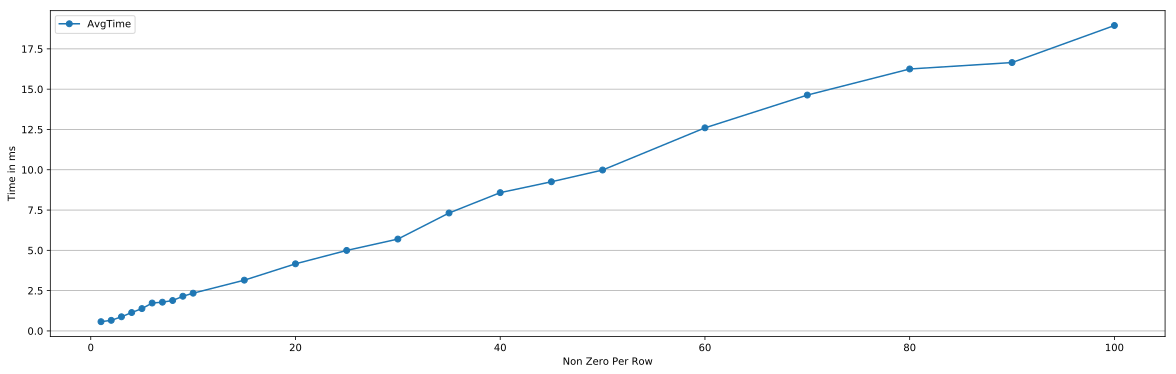

<Figure size 432x288 with 0 Axes>

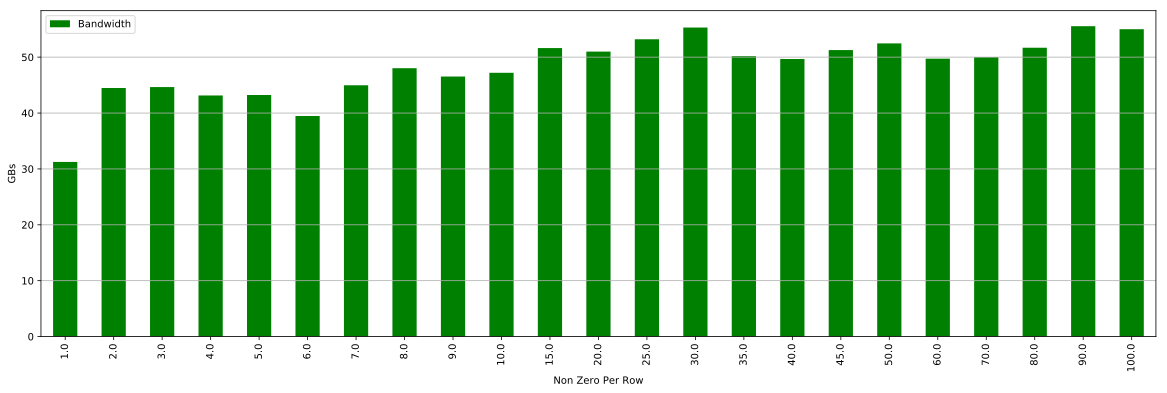

<Figure size 432x288 with 0 Axes>

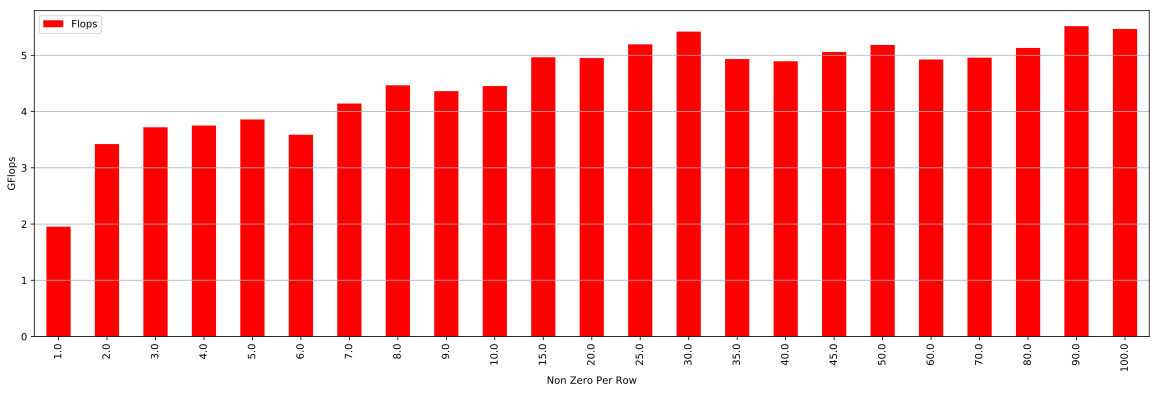

In [51]:
pdf = matplotlib.backends.backend_pdf.PdfPages("CSR5_MPI_CUDA_SpMV_500KR_1MC.pdf")
data = pd.read_csv("CSR5_cuda/CSR5_SpMV_on_GPU.csv")

data = data[data["ValueType"] == 8]
data = data[data["Partition"] == 416]
data = data[data["M"] == 500000]
data = data[data["N"] == 1000000]
data = data.groupby('NonZeroPerRow').mean()
data = data.reset_index() 
data = data.sort_values(by=["NonZeroElements"])
data = data.reset_index(drop=True) 
f = plt.figure()
ax = data.plot(kind="line", marker='o', x="NonZeroPerRow", y="AvgTime", figsize=(20,6))
ax.set_ylabel("Time in ms")
ax.set_xlabel("Non Zero Per Row")
ax.yaxis.grid()
pdf.savefig(bbox_inches = 'tight')


f = plt.figure()
ax = data.plot(kind="bar", x="NonZeroPerRow", y="Bandwidth", color='g', figsize=(20,6))
ax.set_ylabel("GBs")
ax.set_xlabel("Non Zero Per Row")
ax.yaxis.grid()
pdf.savefig(bbox_inches = 'tight')

f = plt.figure()
ax = data.plot(kind="bar", x="NonZeroPerRow", y="Flops", color='r', figsize=(20,6))
ax.set_ylabel("GFlops")
ax.set_xlabel("Non Zero Per Row")
ax.yaxis.grid()
pdf.savefig(bbox_inches = 'tight')

pdf.close()
data

,M,N,AvgTime,TotalRun,NonZeroPerRow,NonZeroElements,Bandwidth,Flops,Partition,ValueType
0,100000,200000,0.114964,1000,4.0,400000,122.266789,10.631890,416,8
1,200000,400000,0.464173,1000,4.0,800000,39.937140,3.472794,416,8
2,300000,600000,0.444333,1000,4.0,1200000,66.501331,5.782724,416,8
3,400000,800000,0.763248,1000,4.0,1600000,51.623678,4.489015,416,8
4,500000,1000000,1.140450,1000,4.0,2000000,43.142699,3.751539,416,8
5,600000,1200000,1.096956,1000,4.0,2400000,50.335710,4.377018,416,8
6,700000,1400000,1.521453,1000,4.0,2800000,43.434535,3.776916,416,8
7,800000,1600000,1.906794,1000,4.0,3200000,39.545389,3.438729,416,8
8,900000,1800000,2.021624,1000,4.0,3600000,41.738690,3.629451,416,8
9,1000000,2000000,2.452670,1000,4.0,4000000,38.190592,3.320921,416,8


<Figure size 432x288 with 0 Axes>

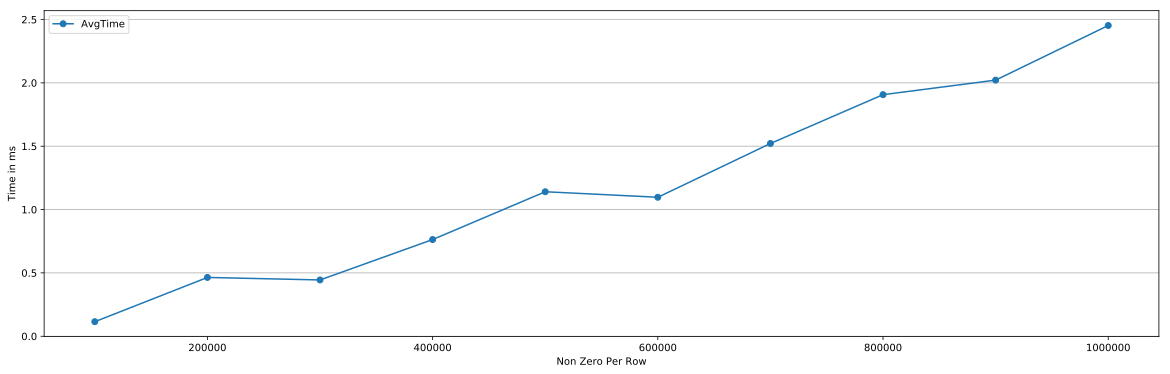

<Figure size 432x288 with 0 Axes>

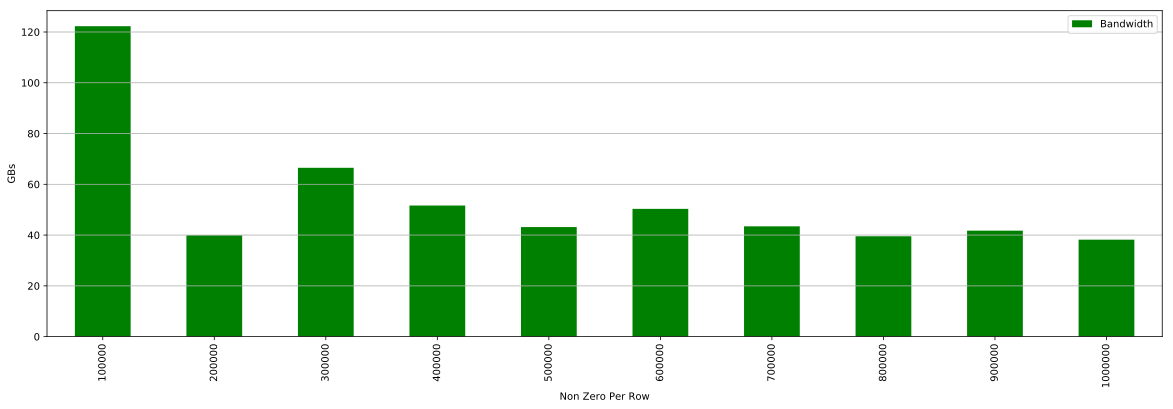

<Figure size 432x288 with 0 Axes>

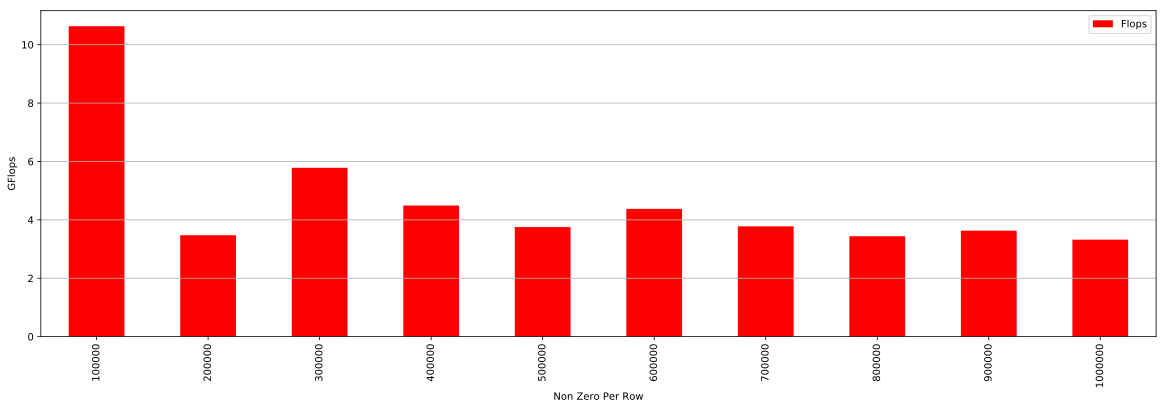

In [52]:
pdf = matplotlib.backends.backend_pdf.PdfPages("CSR5_MPI_CUDA_SpMV_4NNZ_PER_ROW.pdf")
data = pd.read_csv("CSR5_cuda/CSR5_SpMV_on_GPU.csv")

data = data[data["ValueType"] == 8]
data = data[data["Partition"] == 416]
data = data[data["NonZeroPerRow"] == 4]
data = data.groupby('M').mean()
data = data.reset_index() 
data = data.sort_values(by=["M"])
data = data.reset_index(drop=True) 
f = plt.figure()
ax = data.plot(kind="line", marker='o', x="M", y="AvgTime", figsize=(20,6))
ax.set_ylabel("Time in ms")
ax.set_xlabel("Non Zero Per Row")
ax.yaxis.grid()
pdf.savefig(bbox_inches = 'tight')


f = plt.figure()
ax = data.plot(kind="bar", x="M", y="Bandwidth", color='g', figsize=(20,6))
ax.set_ylabel("GBs")
ax.set_xlabel("Non Zero Per Row")
ax.yaxis.grid()
pdf.savefig(bbox_inches = 'tight')

f = plt.figure()
ax = data.plot(kind="bar", x="M", y="Flops", color='r', figsize=(20,6))
ax.set_ylabel("GFlops")
ax.set_xlabel("Non Zero Per Row")
ax.yaxis.grid()
pdf.savefig(bbox_inches = 'tight')

pdf.close()
data

,M,N,AvgTime,TotalRun,NonZeroPerRow,NonZeroElements,Bandwidth,Flops,ValueType
0,100000,200000,0.057147,200,4.0,400000,257.882591,22.424563,8
1,200000,400000,0.129801,200,4.0,800000,150.367363,13.075420,8
2,300000,600000,0.398022,200,4.0,1200000,80.019166,6.958187,8
3,400000,800000,0.504725,200,4.0,1600000,76.052187,6.613233,8
4,500000,1000000,0.856189,200,4.0,2000000,56.354724,4.900410,8
5,600000,1200000,0.994900,200,4.0,2400000,56.678735,4.928585,8
6,700000,1400000,1.113553,200,4.0,2800000,58.265026,5.066524,8
7,800000,1600000,1.450065,200,4.0,3200000,51.400704,4.469626,8
8,900000,1800000,1.585620,200,4.0,3600000,52.621825,4.575811,8
9,1000000,2000000,1.853073,200,4.0,4000000,50.075729,4.354411,8


<Figure size 432x288 with 0 Axes>

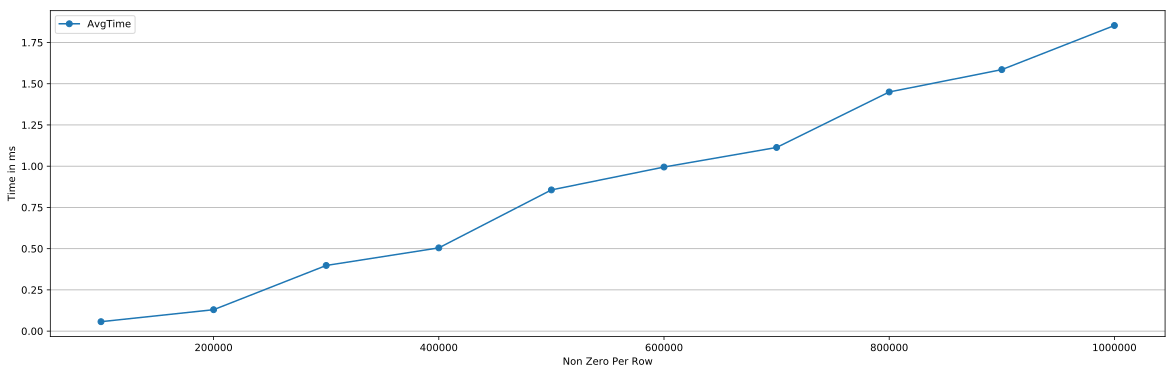

<Figure size 432x288 with 0 Axes>

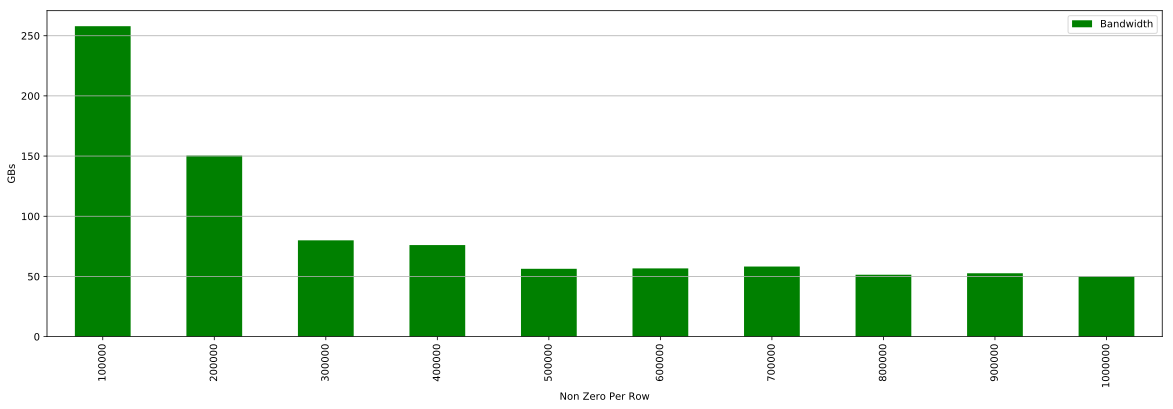

<Figure size 432x288 with 0 Axes>

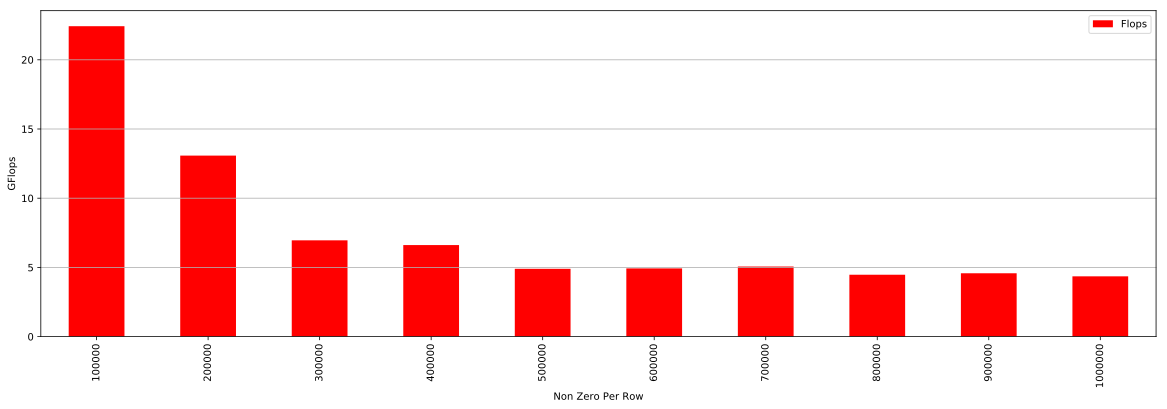

In [54]:
pdf = matplotlib.backends.backend_pdf.PdfPages("CSR_MPI_CUDA_SpMV_500KR_1MC.pdf")
data = pd.read_csv("../Benchmark_SpMV_using_CSR/spmv_cuda/CSR_MPI_CUDA_SpMV.csv")

# Real Data
rdata = data[data["M"] != 500000]
rdata = rdata[rdata["N"] != 1000000]
rdata = rdata.groupby('NonZeroPerRow').mean()
rdata = rdata.reset_index() 
rdata = rdata.sort_values(by=["NonZeroElements"])
rdata = rdata.reset_index(drop=True) 

data = data[data["ValueType"] == 8]
# Synthesis Data
data = data[data["NonZeroPerRow"] == 4]
data = data.groupby('M').mean()
data = data.reset_index() 
data = data.sort_values(by=["M"])
data = data.reset_index(drop=True) 
f = plt.figure()
ax = data.plot(kind="line", marker='o', x="M", y="AvgTime", figsize=(20,6))
ax.set_ylabel("Time in ms")
ax.set_xlabel("Non Zero Per Row")
ax.yaxis.grid()
pdf.savefig(bbox_inches = 'tight')

f = plt.figure()
ax = data.plot(kind="bar", x="M", y="Bandwidth", color='g', figsize=(20,6))
ax.set_ylabel("GBs")
ax.set_xlabel("Non Zero Per Row")
ax.yaxis.grid()
pdf.savefig(bbox_inches = 'tight')

f = plt.figure()
ax = data.plot(kind="bar", x="M", y="Flops", color='r', figsize=(20,6))
ax.set_ylabel("GFlops")
ax.set_xlabel("Non Zero Per Row")
ax.yaxis.grid()
pdf.savefig(bbox_inches = 'tight')
# ax.scatter(rdata[['NonZeroPerRow']], rdata[["AvgTime"]])
pdf.close()
data

In [ ]:
pdf = matplotlib.backends.backend_pdf.PdfPages("CSR_MPI_CUDA_SpMV_4NNZ_PER_ROW.pdf")
data = pd.read_csv("../Benchmark_SpMV_using_CSR/spmv_cuda/CSR_MPI_CUDA_SpMV.csv")

data = data[data["ValueType"] == 8]
data = data[data["Partition"] == 416]
# Real Data
rdata = data[data["M"] != 500000]
rdata = rdata[rdata["N"] != 1000000]
rdata = rdata.groupby('NonZeroPerRow').mean()
rdata = rdata.reset_index() 
rdata = rdata.sort_values(by=["NonZeroElements"])
rdata = rdata.reset_index(drop=True) 
# Synthesis Data
data = data[data["M"] == 500000]
data = data[data["N"] == 1000000]
data = data.groupby('NonZeroPerRow').mean()
data = data.reset_index() 
data = data.sort_values(by=["NonZeroElements"])
data = data.reset_index(drop=True) 
f = plt.figure()
ax = data.plot(kind="line", marker='o', x="NonZeroPerRow", y="AvgTime", figsize=(20,6))
ax.set_ylabel("Time in ms")
ax.set_xlabel("Non Zero Per Row")
ax.yaxis.grid()
pdf.savefig(bbox_inches = 'tight')

f = plt.figure()
ax = data.plot(kind="bar", x="NonZeroPerRow", y="Bandwidth", color='g', figsize=(20,6))
ax.set_ylabel("GBs")
ax.set_xlabel("Non Zero Per Row")
ax.yaxis.grid()
pdf.savefig(bbox_inches = 'tight')

f = plt.figure()
ax = data.plot(kind="bar", x="NonZeroPerRow", y="Flops", color='r', figsize=(20,6))
ax.set_ylabel("GFlops")
ax.set_xlabel("Non Zero Per Row")
ax.yaxis.grid()
pdf.savefig(bbox_inches = 'tight')
# ax.scatter(rdata[['NonZeroPerRow']], rdata[["AvgTime"]])
pdf.close()
data

In [48]:
rdata

,NonZeroPerRow,M,N,AvgTime,TotalRun,NonZeroElements,Bandwidth,Flops,ValueType
0,3.835031,80209,80209,0.959005,200,307604,7.418814,0.641514,8
1,7.986301,74752,74752,0.155303,200,596992,82.657381,7.688136,8
2,3.809862,1447360,1447360,1.094176,200,5514242,116.692601,10.081556,8
3,19.243892,5154859,5154859,5.511988,200,99199551,371.163656,35.994115,8
4,76.281421,3072441,3072441,66.907837,200,234370166,70.608742,7.005769,8
